In [1]:
import os
import numpy as np
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
train_data_path = 'cifake dataset/train'
test_data_path = 'cifake dataset/test'

# Create empty lists to store image data and labels
data = []
labels = []

# Loop through the REAL and FAKE subfolders in the train data directory
for folder in os.listdir(train_data_path):
    folder_path = os.path.join(train_data_path, folder)
    label = folder  # Label is either 'REAL' or 'FAKE'

    # Loop through the images in each subfolder
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        image = cv2.resize(image, (32, 32))  # we are given 32*32 images but created check for consistency
        data.append(image)
        labels.append(label)

In [3]:
# Convert data and labels to NumPy arrays
data = np.array(data)
labels = np.array(labels)

# Encode the labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Split the data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

In [4]:
# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
dt_classifier.fit(X_train.reshape(-1, 32*32*3), y_train)
print("Model Trained")

# Make predictions on the validation data
val_predictions = dt_classifier.predict(X_val.reshape(-1, 32*32*3))

# Calculate accuracy on the validation set
validation_accuracy = accuracy_score(y_val, val_predictions)
print("Validation Accuracy:", validation_accuracy)

Model Trained
Validation Accuracy: 0.69345


### TEST DATA

In [5]:
# Load and preprocess the test data
test_data = []
test_labels = []

for folder in os.listdir(test_data_path):
    folder_path = os.path.join(test_data_path, folder)
    label = folder  # Label is either 'REAL' or 'FAKE'

    # Loop through the images in each subfolder
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        image = cv2.resize(image, (32, 32))  # we are given 32*32 images but created check for consistency
        test_data.append(image)
        test_labels.append(label)

In [6]:
# Convert test data to a NumPy array
test_data = np.array(test_data)

# Make predictions on the test data
test_predictions = dt_classifier.predict(test_data.reshape(-1, 32*32*3))
# Map the predicted labels back to 'real' and 'fake'
test_predictions = label_encoder.inverse_transform(test_predictions)

# Calculate accuracy on the test data
test_accuracy = accuracy_score(test_labels, test_predictions)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.69765


Test Precision: 0.6971571072319201
Test Recall: 0.6989
Test F1-Score: 0.6980274656679151
Test Specificity: 0.6989
Test False Positive Rate: 0.3011
Test ROC Curve and AUC-ROC:


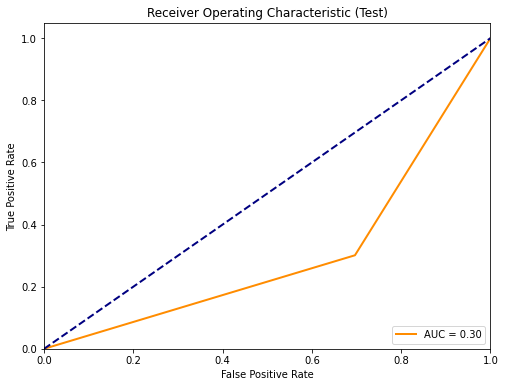

Test Precision-Recall Curve and AUC-PR:


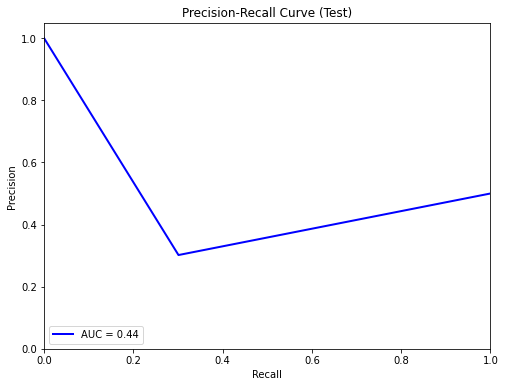

Test Confusion Matrix:
[[6989 3011]
 [3036 6964]]


In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Calculate precision, recall, and F1-Score on the test data
test_precision = precision_score(test_labels, test_predictions, pos_label='FAKE')
test_recall = recall_score(test_labels, test_predictions, pos_label='FAKE')
test_f1 = f1_score(test_labels, test_predictions, pos_label='FAKE')
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1-Score:", test_f1)

# Calculate specificity and false positive rate on the test data
test_conf_matrix = confusion_matrix(test_labels, test_predictions)
test_tn, test_fp, test_fn, test_tp = test_conf_matrix.ravel()
test_specificity = test_tn / (test_tn + test_fp)
test_fpr = test_fp / (test_tn + test_fp)
print("Test Specificity:", test_specificity)
print("Test False Positive Rate:", test_fpr)

# Calculate ROC curve and AUC-ROC on the test data
test_y_prob = dt_classifier.predict_proba(test_data.reshape(-1, 32*32*3))
test_fpr, test_tpr, test_thresholds = roc_curve(test_labels, test_y_prob[:, 1], pos_label='FAKE')
test_roc_auc = auc(test_fpr, test_tpr)
print("Test ROC Curve and AUC-ROC:")
plt.figure(figsize=(8, 6))
plt.plot(test_fpr, test_tpr, color='darkorange', lw=2, label=f'AUC = {test_roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Test)')
plt.legend(loc='lower right')
plt.show()

# Calculate Precision-Recall curve and AUC-PR on the test data
test_precision, test_recall, _ = precision_recall_curve(test_labels, test_y_prob[:, 1], pos_label='FAKE')
test_pr_auc = average_precision_score(test_labels, test_y_prob[:, 1], pos_label='FAKE')
print("Test Precision-Recall Curve and AUC-PR:")
plt.figure(figsize=(8, 6))
plt.plot(test_recall, test_precision, color='blue', lw=2, label=f'AUC = {test_pr_auc:.2f}')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Test)')
plt.legend(loc='lower left')
plt.show()

# Calculate the confusion matrix on the test data
print("Test Confusion Matrix:")
print(test_conf_matrix)